RMSE: 11.69442499247158


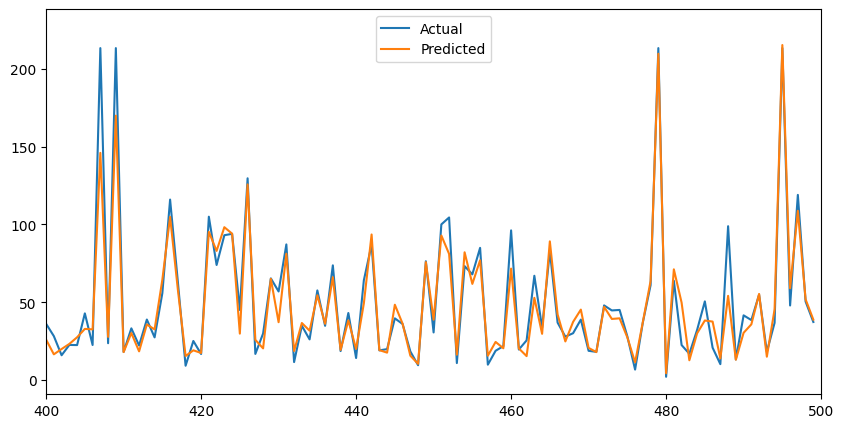

In [17]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('kurla_cleaned.csv')
df=df.drop(df[['Date']],axis=1)
# Separate target variable
y = df['PM2.5']
X = df.drop(['PM2.5'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42)

# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = xgb_model.predict(X_test)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
# plt.plot(y_test.values, label='Actual')
# plt.plot(y_pred, label='Predicted')
# plt.legend()
# plt.show()


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(y_test.values[3000:3500], label='Actual')
ax.plot(y_pred[3000:3500], label='Predicted')
ax.set_xlim(400, 500)  # set x-axis limit to show only the first 100 data points
ax.legend()
plt.show()